# Test PDPbox with Regression problem
## Kaggle Rossmann store with RandomForest regressor
This demo is based on **Rossmann Store Sales**  
https://www.kaggle.com/c/otto-group-product-classification-challenge

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
import sys
sys.path.insert(0, '../../')

from pdpbox import pdp, get_dataset

## get dataset

In [3]:
test_ross = get_dataset.ross()
test_ross.keys()

['data', 'features', 'rf_model', 'target']

In [4]:
ross_data = test_ross['data']
ross_features = test_ross['features']
ross_model = test_ross['rf_model']
ross_target = test_ross['target']

In [5]:
ross_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

## binary feature: SchoolHoliday

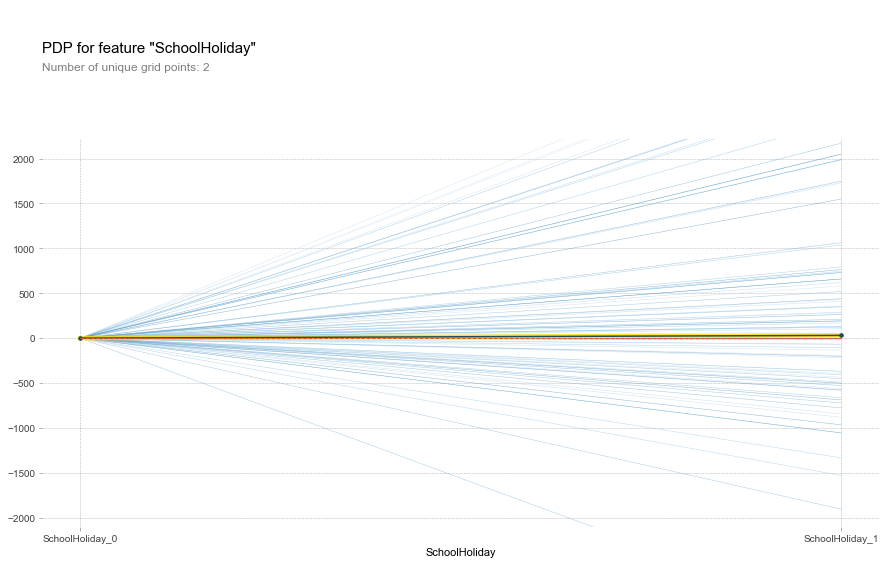

In [6]:
pdp_SchoolHoliday = pdp.pdp_isolate(model=ross_model, dataset=ross_data, model_features=ross_features, feature='SchoolHoliday')
fig, axes = pdp.pdp_plot(pdp_SchoolHoliday, 'SchoolHoliday', plot_lines=True, frac_to_plot=100)

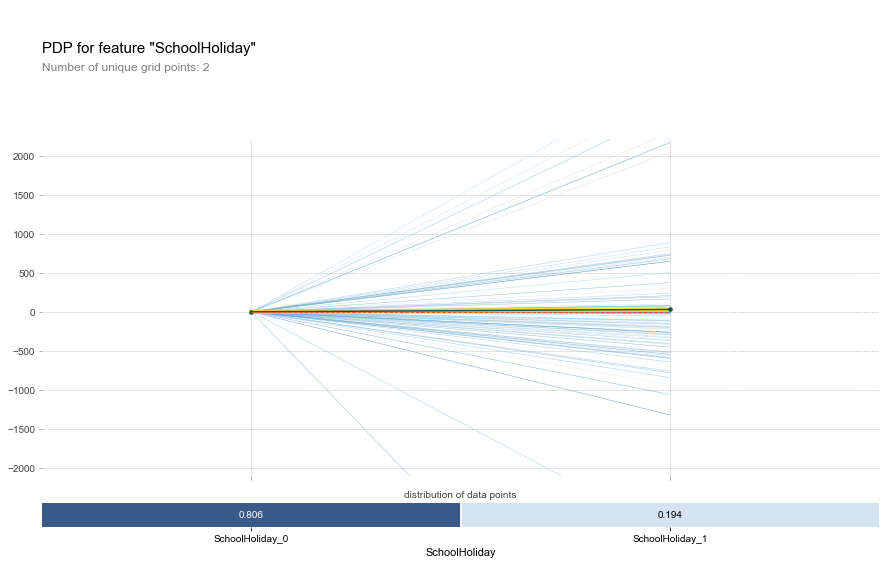

In [7]:
fig, axes = pdp.pdp_plot(pdp_SchoolHoliday, 'SchoolHoliday', plot_lines=True, frac_to_plot=100, plot_pts_dist=True)

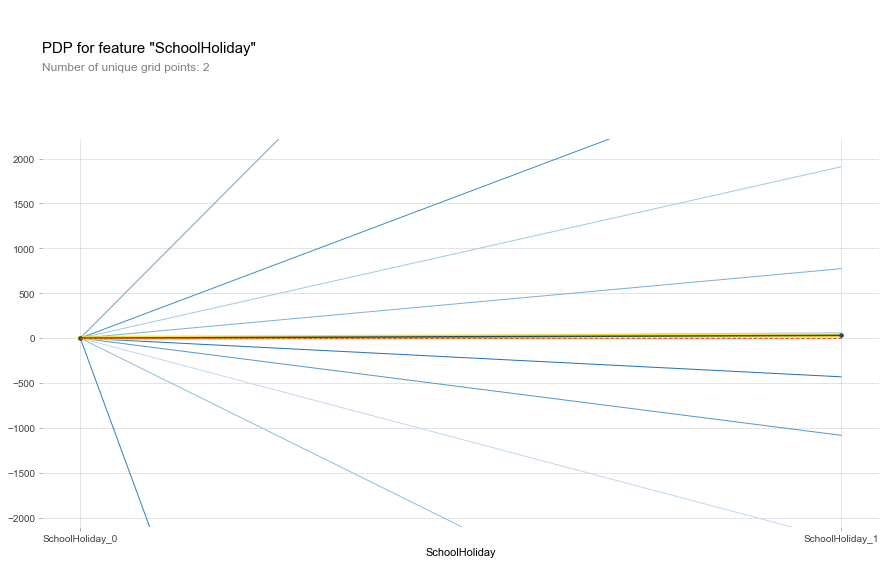

In [8]:
# cluster the individual lines
fig, axes = pdp.pdp_plot(pdp_SchoolHoliday, 'SchoolHoliday', plot_lines=True, frac_to_plot=100, cluster=True, 
                         n_cluster_centers=10, cluster_method='accurate')

## onehot encoding feature: StoreType

Wall time: 9.86 s


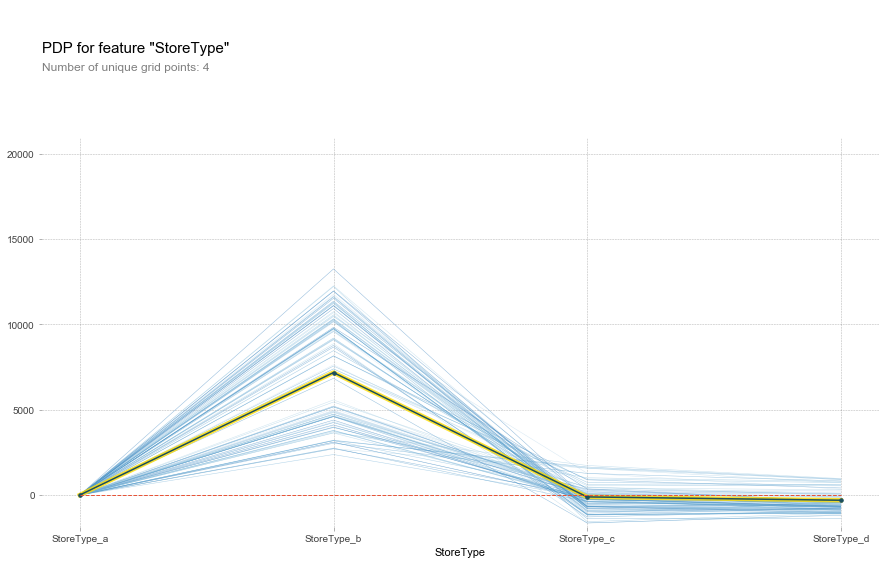

In [9]:
%%time
pdp_StoreType = pdp.pdp_isolate(model=ross_model, dataset=ross_data, model_features=ross_features, 
                                feature=['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d'])
fig, axes = pdp.pdp_plot(pdp_StoreType, 'StoreType', plot_lines=True, frac_to_plot=100)

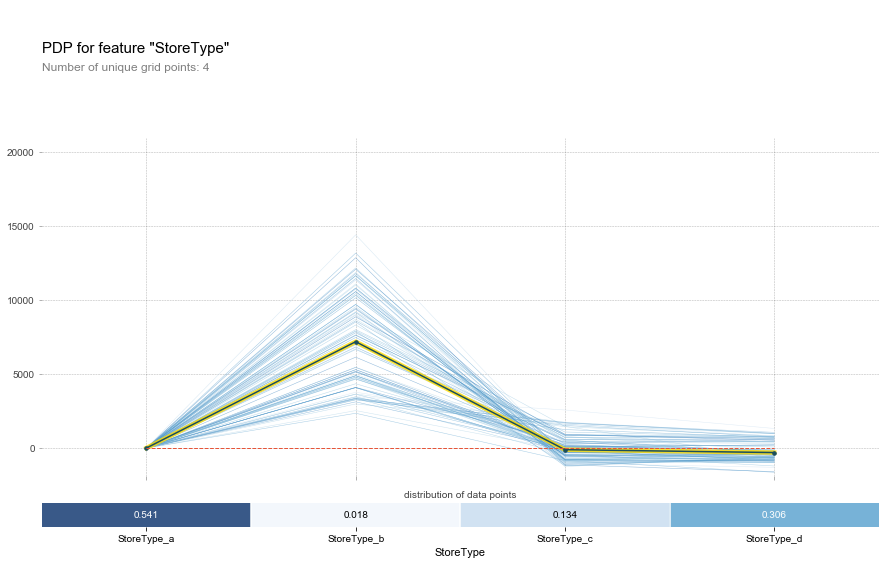

In [10]:
fig, axes = pdp.pdp_plot(pdp_StoreType, 'StoreType', plot_lines=True, frac_to_plot=100, plot_pts_dist=True)

## numeric feature: weekofyear

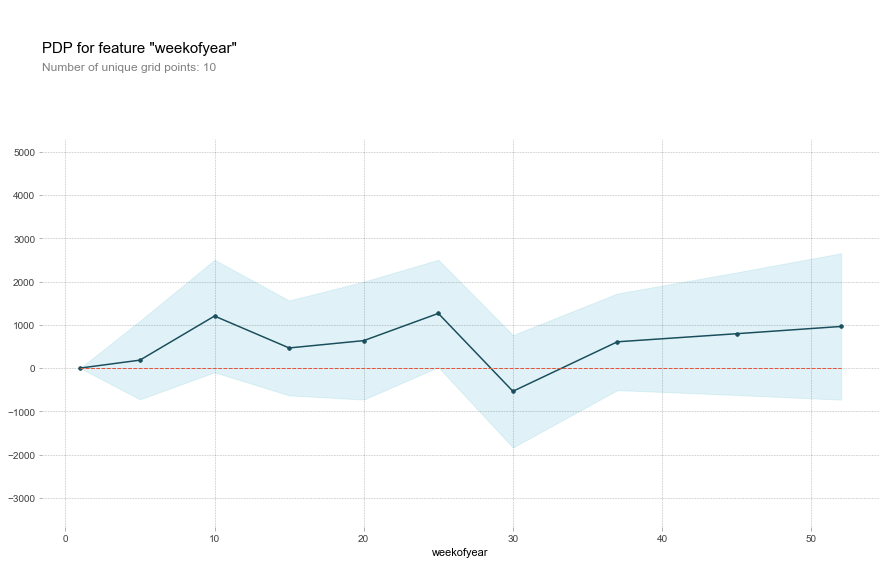

In [11]:
pdp_weekofyear = pdp.pdp_isolate(model=ross_model, dataset=ross_data, model_features=ross_features, 
                                 feature='weekofyear')
fig, axes = pdp.pdp_plot(pdp_weekofyear, 'weekofyear')

(<matplotlib.figure.Figure at 0x195f3048>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1cf2a908>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x18ed7a20>})

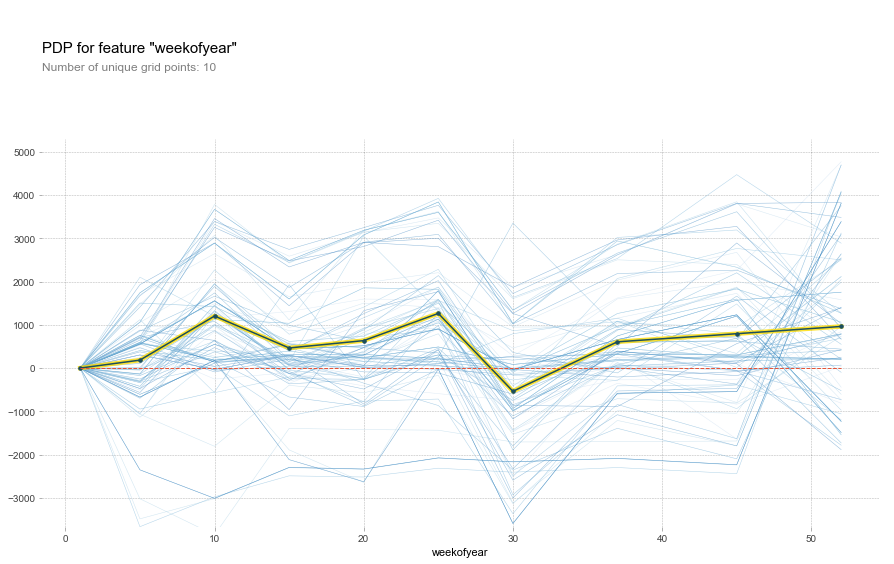

In [12]:
pdp.pdp_plot(pdp_weekofyear, 'weekofyear', plot_lines=True, frac_to_plot=100)

(<matplotlib.figure.Figure at 0x1b09e240>,
 {'pdp_ax': {'_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x18ca7b00>,
   '_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x18ea8e48>},
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x195fe550>})

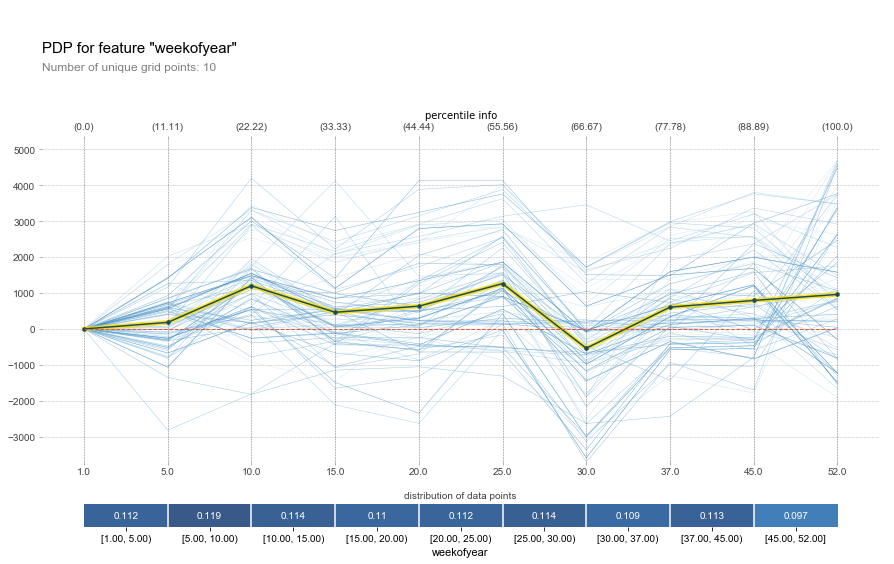

In [13]:
pdp.pdp_plot(pdp_weekofyear, 'weekofyear', plot_lines=True, frac_to_plot=100, x_quantile=True, 
             plot_pts_dist=True, show_percentile=True)

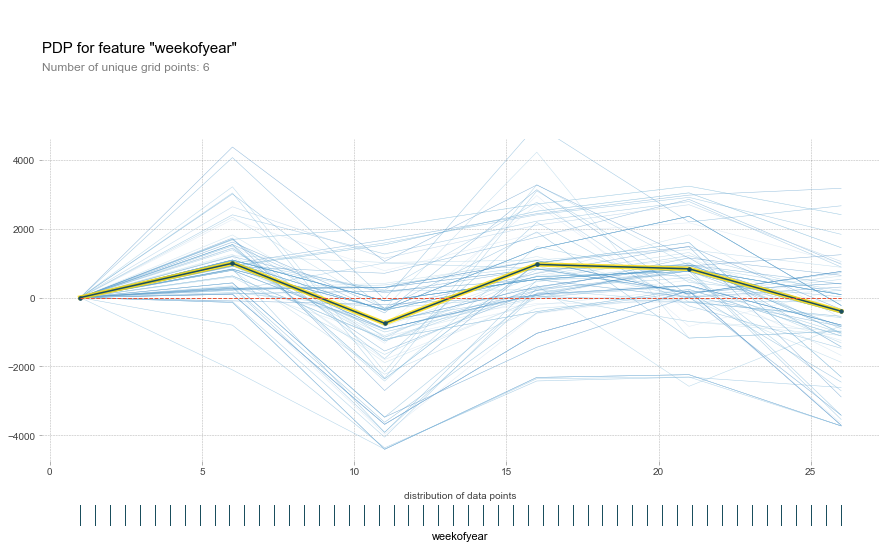

In [14]:
pdp_weekofyear = pdp.pdp_isolate(model=ross_model, dataset=ross_data, model_features=ross_features,
                                 feature='weekofyear', cust_grid_points=range(1, 30, 5))
fig, axes = pdp.pdp_plot(pdp_weekofyear, 'weekofyear', plot_lines=True, frac_to_plot=100, plot_pts_dist=True)

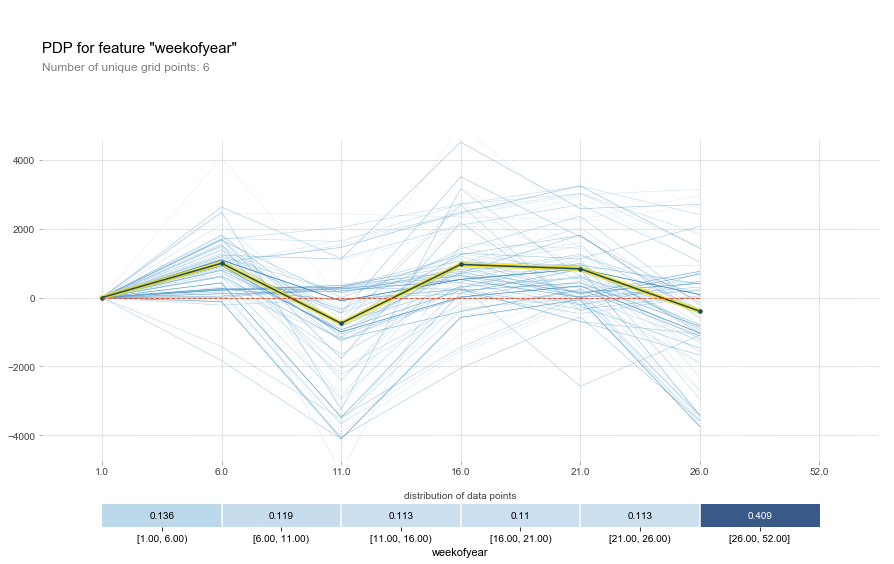

In [15]:
fig, axes = pdp.pdp_plot(pdp_weekofyear, 'weekofyear', plot_lines=True, frac_to_plot=100, plot_pts_dist=True, x_quantile=True)

In [16]:
axes

{'pdp_ax': {'_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x23fb1c18>,
  '_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x195f3f98>},
 'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x23a070b8>}

## test interaction

In [ ]:
%%time
inter_rf = pdp.pdp_interact(model=ross_model, 
                            dataset=ross_data,
                            model_features=ross_features, 
                            features=[['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d'], 'weekofyear'], 
                            num_grid_points=[10, 10])

In [ ]:
fig, axes = pdp.pdp_interact_plot(inter_rf, ['StoreType', 'weekofyear'], x_quantile=True, 
                                  plot_type='contour', plot_pdp=False)

In [ ]:
fig, axes = pdp.pdp_interact_plot(inter_rf, ['StoreType', 'weekofyear'], x_quantile=True, 
                                  plot_type='contour', plot_pdp=True)

In [ ]:
fig, axes = pdp.pdp_interact_plot(inter_rf, ['StoreType', 'weekofyear'], x_quantile=True, 
                                  plot_type='grid', plot_pdp=True)